In [3]:
from PIL import Image
import numpy
from maze_generator import generate_maze

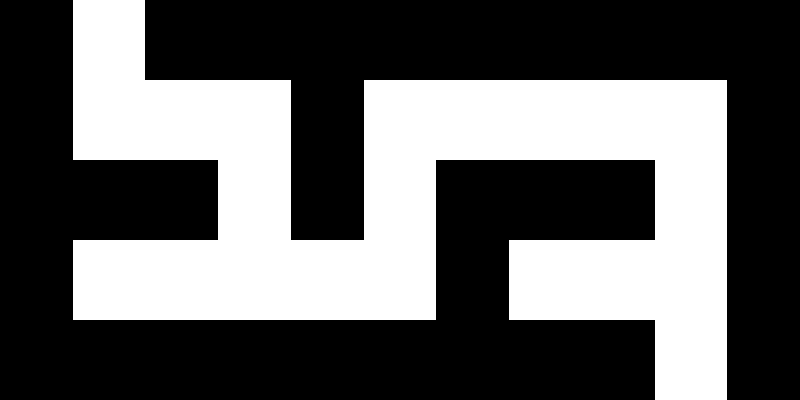

In [4]:
maze_width = 5
maze_height = int(maze_width/2)
maze_image =  generate_maze(maze_width, maze_height)

pix = numpy.array(maze_image)
maze_matrix = []

for row in pix:
    maz_row = []
    for pixel in row:
        if pixel[0] == 255:
            maz_row.append(0)
        else:
            maz_row.append(1)
    maze_matrix.append(maz_row)

image = maze_image.resize((800,400),Image.NEAREST)
image

In [5]:
maze_matrix

[[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
 [1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1],
 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]]

In [11]:
maze_height = len(maze_matrix)
maze_width = len(maze_matrix[0])

solved_maze = [[0 for x in range(maze_width)] for x in range(maze_height)]

start_x = 0
start_y = 1

end_x = len(maze_matrix)-1
end_y = len(maze_matrix[len(maze_matrix) - 1]) - 2

solved_maze[start_x][start_y] = 1

step = 0

while solved_maze[end_x][end_y] == 0:
    step = step + 1
    for x in range(maze_height):
        for y in range(maze_width):
            if solved_maze[x][y] == step:
                if (x - 1) > 0 and maze_matrix[x-1][y] == 0:
                    solved_maze[x-1][y] = step + 1
                if (x + 1) < maze_height and maze_matrix[x + 1][y] == 0:
                    solved_maze[x+1][y] = step + 1
                if (y - 1) > 0 and maze_matrix[x][y-1] == 0:
                    solved_maze[x][y-1] = step + 1
                if (y + 1) < maze_width and maze_matrix[x][y + 1] == 0:
                    solved_maze[x][y+1] = step + 1

solved_maze

[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 16, 17, 16, 0, 16, 17, 16, 17, 16, 0],
 [0, 0, 0, 17, 0, 17, 0, 0, 0, 17, 0],
 [0, 16, 17, 16, 17, 16, 0, 0, 17, 16, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 17, 0]]

In [ ]:

from PIL import Image, ImageDraw
images = []

a = maze_matrix
zoom = 20
borders = 6
start_i, start_j = 0, 1
end_i, end_j = len(maze_matrix)-1, len(maze_matrix[len(maze_matrix) - 1]) - 2


def draw_matrix(a, the_path=[]):
    im = Image.new('RGB', (zoom * len(a[0]), zoom * len(a)), (255, 255, 255))
    draw = ImageDraw.Draw(im)
    for i in range(len(a)):
        for j in range(len(a[i])):
            color = (255, 255, 255)
            r = 0
            if a[i][j] == 1:
                color = (0, 0, 0)
            if i == start_j and j == start_j:
                color = (0, 255, 0)
                r = borders
            if i == end_i and j == end_j:
                color = (0, 255, 0)
                r = borders
            draw.rectangle((j*zoom+r, i*zoom+r, j*zoom+zoom-r-1, i*zoom+zoom-r-1), fill=color)
            if a[i][j] == 2:
                r = borders
                draw.ellipse((j * zoom + r, i * zoom + r, j * zoom + zoom - r - 1, i * zoom + zoom - r - 1),
                               fill=(128, 128, 128))
    for u in range(len(the_path)-1):
        y = the_path[u][0]*zoom + int(zoom/2)
        x = the_path[u][1]*zoom + int(zoom/2)
        y1 = the_path[u+1][0]*zoom + int(zoom/2)
        x1 = the_path[u+1][1]*zoom + int(zoom/2)
        draw.line((x,y,x1,y1), fill=(255, 0, 0), width=5)
    draw.rectangle((0, 0, zoom * len(a[0]), zoom * len(a)), outline=(0, 255, 0), width=2)
    images.append(im)


path_so_far = []


def go_to(i, j):
    global path_so_far, end_i, end_j, a, m
    if i < 0 or j < 0 or i > len(a)-1 or j > len(a[0])-1:
        return
    # If we've already been there or there is a wall, quit
    if (i, j) in path_so_far or a[i][j] > 0:
        return
    path_so_far.append((i, j))
    a[i][j] = 2
    draw_matrix(a, path_so_far)
    if (i, j) == (end_i, end_j):
        print("Found!", path_so_far)
        for animate in range(10):
            if animate % 2 == 0:
                draw_matrix(a, path_so_far)
            else:
                draw_matrix(a)
        path_so_far.pop()
        return
    else:
        go_to(i - 1, j)  # check top
        go_to(i + 1, j)  # check bottom
        go_to(i, j + 1)  # check right
        go_to(i, j - 1)  # check left
    path_so_far.pop()
    draw_matrix(a, path_so_far)
    return


go_to(start_i, start_j)


images[0].save('maze.gif',
               save_all=True, append_images=images[1:],
               optimize=False, duration=50, loop=0)

In [ ]:
a